In [1]:
import numpy as np
import matplotlib.pyplot as plt
import vectorbt as vbt

### Deep Learning from Scratch

* Cross-entropy (cross-entropy) - the function of input for tasks of classification, as it is victorious for evaluating the difference between the actual class marks and the transferring class differences.

* Softmax - this is a function that accepts a vector of numbers and transforms it into a vector of dynamics that can be confused to one. Softmax sound victorious in the tasks of classification, it is necessary to transfer the object's immovability to the skin class.



In [8]:
def softmax(x):
    exp_scores = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)


def cross_entropy(y, y_pred):
    n_samples = y.shape[0]
    return -np.sum(y * np.log(y_pred+1e-9)) / n_samples

def get_class(price, min_price, price_range):
    if price <= min_price + price_range:
        return 0
    elif price <= min_price + 2 * price_range:
        return 1
    else:
        return 2


In [80]:
class NeuralNetwork:
    def __init__(self, input_dim, output_dim):
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.W = np.random.randn(input_dim, output_dim)
        self.b = np.zeros(output_dim)
        self.history = []
        
    def forward(self, X):
        return softmax(X.dot(self.W) + self.b)
    
    def train(self, X, y, epochs, lr):
        for i in range(epochs):
            loss, dW, db = self.loss_gradient(X, y)
            self.history.append(loss)
            self.W -= lr * dW
            self.b -= lr * db
            if i % 10 == 0:
                print(f"Epoch {i}, loss: {loss}")
                
    def loss_gradient(self, X, y):
        y_pred = self.forward(X)
        loss = cross_entropy(y, y_pred)
        dL_dy = y_pred - y
        dW = X.T.dot(dL_dy)
        db = np.sum(dL_dy, axis=0)
        return loss, dW, db




In [81]:
# X = np.random.randn(100, 5)
# y = np.random.randint(0, 3, size=(100, 1))

start = '2022-01-01'
end = '2023-01-01'
interval = '1h'
btc_data = vbt.BinanceData.download('BTCUSDT', interval=interval, start=start, end=end).get()

/home/serg/miniconda3/envs/tf/lib/python3.10/site-packages/dateparser/date_parser.py:35: PytzUsageWarning: The localize method is no longer necessary, as this time zone supports the fold attribute (PEP 495). For more details on migrating to a PEP 495-compliant implementation, see https://pytz-deprecation-shim.readthedocs.io/en/latest/migration.html
  date_obj = stz.localize(date_obj)


0it [00:00, ?it/s]

In [120]:
X = btc_data[['Open', 'High', 'Low', 'Close', 'Volume']].vbt.to_2d_array()

min_price = btc_data['Close'].min()
max_price = btc_data['Close'].max()
price_range = (max_price - min_price) / 3
btc_data['y'] = btc_data['Close'].apply(lambda x: get_class(x, min_price, price_range))
y = btc_data['y'].vbt.to_2d_array()
print(X.shape, y.shape)

(8760, 5) (8760, 1)


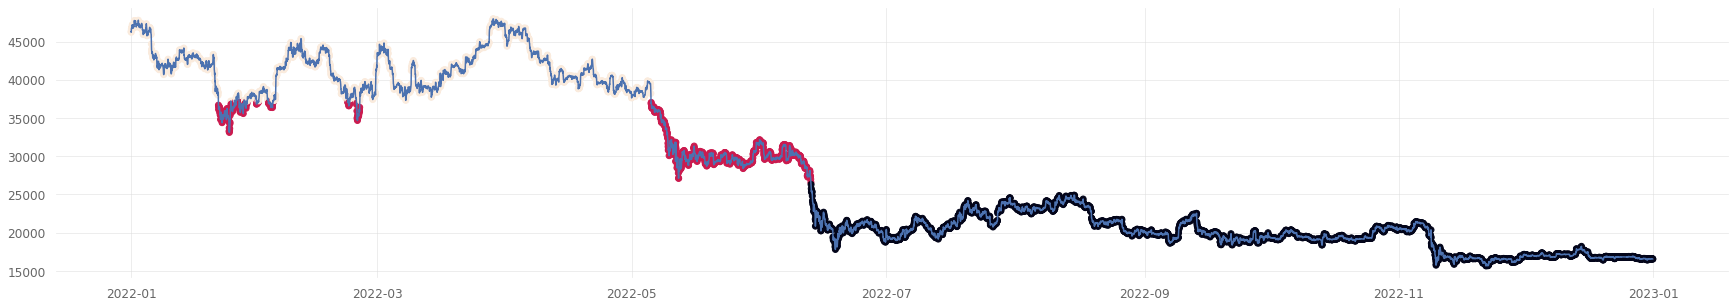

In [107]:
btc_data['y'] = y
plt.figure(figsize=(30, 5))
plt.plot(btc_data['Close'])
plt.scatter(btc_data['Close'].index, btc_data['Close'], c=btc_data['y'])
plt.show()


In [121]:
# scale data
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

In [125]:
nn = NeuralNetwork(5, 3)
nn.train(X, y, epochs=5000, lr=0.0001)

Epoch 0, loss: 4.114806755396945
Epoch 10, loss: 2.5392066036880725
Epoch 20, loss: 2.521630516735924
Epoch 30, loss: 2.5202744259999377
Epoch 40, loss: 2.5202039012323527
Epoch 50, loss: 2.5201968121149316
Epoch 60, loss: 2.5201955143780235
Epoch 70, loss: 2.5201948793652886
Epoch 80, loss: 2.5201943230425834
Epoch 90, loss: 2.5201937765577713
Epoch 100, loss: 2.520193231758907
Epoch 110, loss: 2.5201926876796694
Epoch 120, loss: 2.5201921442049797
Epoch 130, loss: 2.5201916013206347
Epoch 140, loss: 2.520191059024383
Epoch 150, loss: 2.520190517315396
Epoch 160, loss: 2.5201899761930098
Epoch 170, loss: 2.5201894356565826
Epoch 180, loss: 2.520188895705477
Epoch 190, loss: 2.5201883563390544
Epoch 200, loss: 2.5201878175566788
Epoch 210, loss: 2.520187279357714
Epoch 220, loss: 2.520186741741523
Epoch 230, loss: 2.520186204707473
Epoch 240, loss: 2.5201856682549293
Epoch 250, loss: 2.520185132383258
Epoch 260, loss: 2.5201845970918275
Epoch 270, loss: 2.520184062380004
Epoch 280, los

In [126]:
# predict on training set
y_pred = nn.forward(X)
y_pred = np.argmax(y_pred, axis=1)
print(f"Accuracy: {np.mean(y_pred == y)}")

Accuracy: 0.20190104981130502


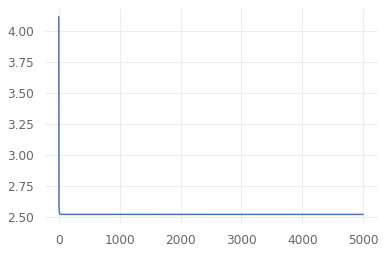

In [127]:
# plot loss
plt.plot(nn.history)
plt.show()
